## Decision Tree - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
df = pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/Dersler/Machine Learning/penguins_size.csv")

Data setimizde penguenlerin yasadiklari ada, gaga uzunluklari, gaga genislikleri, kanat uzunluklari, vucut agirliklari ve cinsiyet bilgileri var.

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [5]:
df.info()   # There are some missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.describe()    # There is no outlier problem.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
10/344      # Only 2% of the dataset is missing values.So, we can drop them.

0.029069767441860465

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [12]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [13]:
df["sex"].unique()    # Sex column has a strange data as "point". We will lok at it.

array(['MALE', 'FEMALE', '.'], dtype=object)

In [14]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [15]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [16]:
df[df["sex"]== "."]     # We check the rows whose the point in the sex column.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [111]:
df[df.species =="Gentoo"]     # Turu Gentoo olan penguenlere ait tum bilgiler :

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We grouped the penguins in which Gentoo class by sex. The goal is to fill the point.

According to column of culmen_depth_mm, we can decide that the point is actually "Male". Because its mean (15.7) suits
vey well.

Note: We applied this method because of having very less missing values.

In [17]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [18]:
df.loc[336, "sex"] = "MALE"

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 29.0+ KB


## Visualization

In [20]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

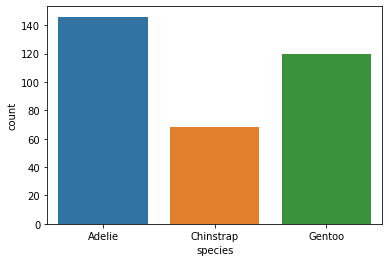

In [21]:
sns.countplot(x="species", data = df);     

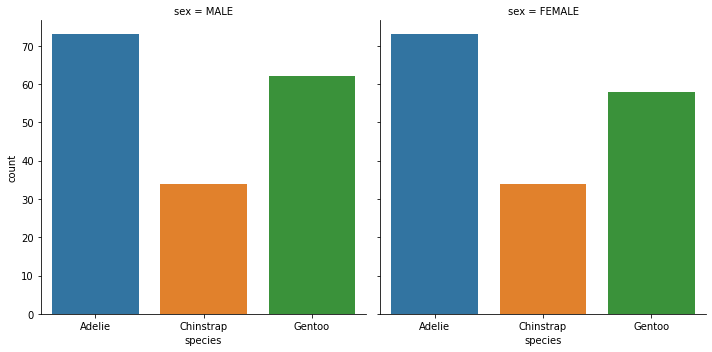

In [23]:
sns.catplot(x='species', data=df, kind='count',col='sex');

<Figure size 864x432 with 0 Axes>

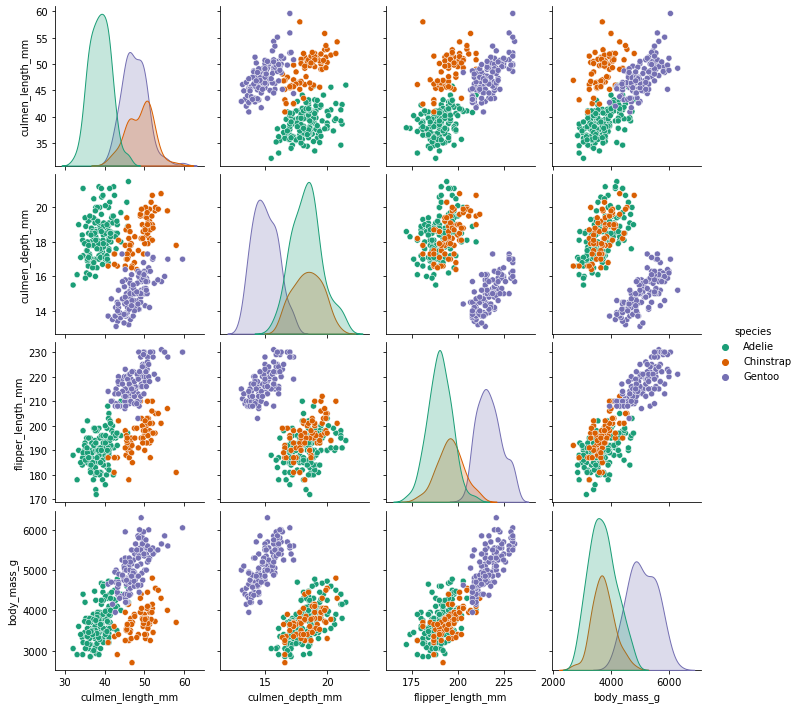

In [24]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2');

In [26]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [121]:
#!pip install plotly   # 3 boyutlu gorsel sagliyor.

In [122]:
#import plotly.express as px

In [25]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();                                    

NameError: name 'px' is not defined

In [27]:
df.select_dtypes("number")    # We chose numeric values.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


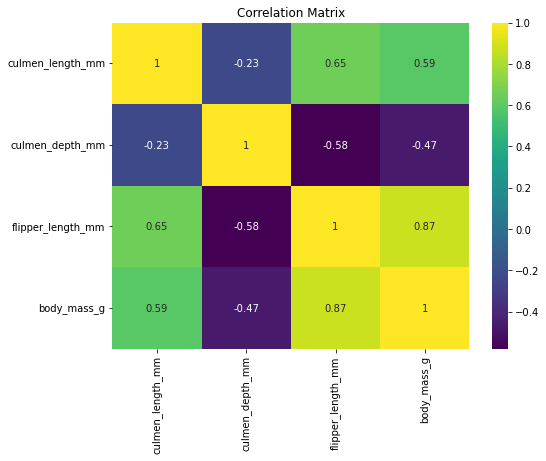

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();        

flipper_length_mm ile body_mass_g arasinda yuksek corr iliskisi oldugu gorunuyor. Ancak tree based modeller non-parametric algoritma olduklari icin, if else metodu ile yollarina devam ettikleri icin nicel degerler ile ugrasmazlar. Burada multicolinearity olsa bile modelimiz icin bir sorun teskil etmez. Modelimiz, buradaki feature' lardan birini on plana cikarip digerlerini onemsizlestirecegi icin multicollineraity sorununu yener.

## Feature Engineering

In [30]:
df.drop("species", axis =1) 

# We have to apply get_dummies.

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [31]:
pd.get_dummies(df.drop("species", axis =1), drop_first =True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train | Test Split

In [32]:
X = pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y = df["species"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modelling - Decision Tree Classifier

!!! No SCALE process because tree-based models don't need scaling. !!!

Since Scale step will not be applied, we don't need to use pipeline.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
DT_model = DecisionTreeClassifier(random_state=101)

In [41]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [42]:
y_pred = DT_model.predict(X_test)

Above, we made our trainings according to the DT model and got our estimates.

## Model Performance on Classification Tasks

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [45]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In the image below, we see that the predictions are very good. Our model made 1 error in Adelie type and 2 errors in Chinstrap type; Gentoo knew all of its kind.

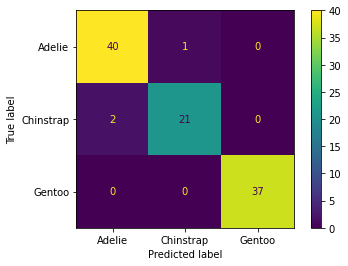

In [46]:
plot_confusion_matrix(DT_model,X_test,y_test);

Below graphic is used to show the classes of the errors.

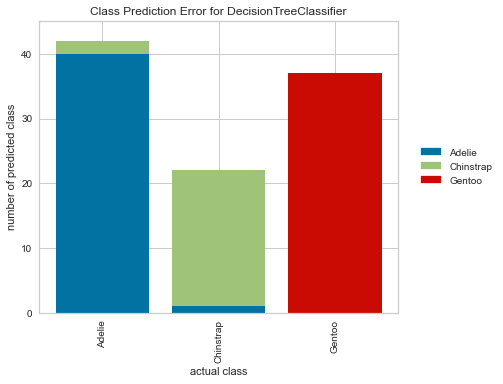

In [48]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [50]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



Above, the model made 3 errors in test dataset and no error in train dataset.

The most problematic side of the model is being in the overfitting situation.

Predictions in the train dataset are 100 % correct but we don't mention any overfitting situation here because of being high the scores in the test dataset.

!!! Micro, Macro, or Weighted are considered in the multi-class data. !!!

If all scores are near to each other -------> micro (Accuracy)

If there is an umbalanced situation -------> macro

If there is an umbalanced situation and you want to get a result by the class whose more data ------> weighted

We will apply CrossValidate if they give same reliability in whole dataset.

## Cross Validate

In [51]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [53]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.004225,0.007590,0.958333,0.958333,0.958333,0.958333
2,0.003914,0.004681,0.958333,0.958333,0.958333,0.958333
3,0.003309,0.005166,0.916667,0.916667,0.916667,0.916667
4,0.003389,0.005862,0.956522,0.956522,0.956522,0.956522
5,0.003612,0.004831,1.000000,1.000000,1.000000,1.000000
6,0.003351,0.011668,1.000000,1.000000,1.000000,1.000000
7,0.004218,0.006818,1.000000,1.000000,1.000000,1.000000
8,0.003002,0.005502,1.000000,1.000000,1.000000,1.000000
9,0.003051,0.005992,0.869565,0.869565,0.869565,0.869565
10,0.003077,0.006058,1.000000,1.000000,1.000000,1.000000


In [54]:
df_scores.mean()[2:]

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

CrossValidate showed that the model is reliable.

## Feature Importances

In [55]:
DT_model.feature_importances_

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

The values above indicates the importance of each features as a percentage. Sum of the values equals to 1.

Ilk 3 feature' in tur belirlemede hic katkisinin olmadigi goruluyor. Decision Tree model bazi feature' lara cok fazla onem verir ve bu yuzden de skorlar cok kolay bir sekilde overfitting' e gider.

Mesela kadin-erkek ayriminin yapildigi bir data setinde bir feature da sakal var mi yok mu bilgisi var diyelim. Bu feature tek basina %100 oraninda cinsiyet ayrimini yapar. DT model diger tum feature' lari koreltir. Bu da bizi cok kolay bir sekilde overfitting' e goturebilir.

DT' nin bu sikintisindan dolayi daha sonra Random Forest model ortaya konmus. Random Forest butun feature' lardan inside elde eder ve ona gore tahminler yapar. ( Iki modelin arasindaki fark, Ridge ve Lasso gibi)

!!! Yani modelin overfitting' e gitme sebebi sadece comlexity degil; bazi feature' larin cok kuvvetli olmasi da olabilir. !!!

In [59]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
culmen_depth_mm,0.052893
island_Dream,0.078360
culmen_length_mm,0.325918
flipper_length_mm,0.542829


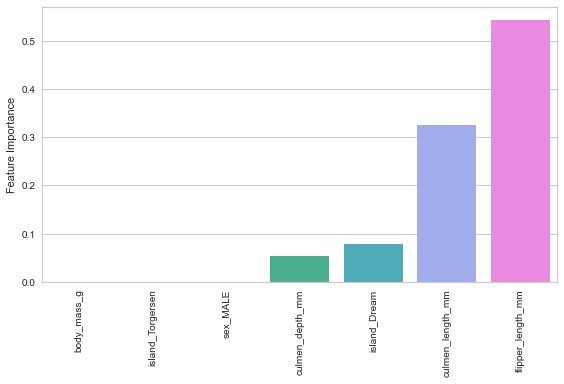

In [60]:
sns.barplot(x = df_f_i.index, y = "Feature Importance", data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout();

## Drop most important feature

En onemli feature olan 'flipper_length_mm' sutununu dusurerek modeli yeniden kurup tahminlerimiz degisiyor mu bakalim :

In [62]:
X2 = X.drop(columns = ["flipper_length_mm"]) 
# The feature that weighs too much on the estimate can sometimes cause overfitting. 
#For this reason, the most important feature can be dropped and the scores can be checked again

In [63]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [64]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [65]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [66]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



En onemli feature'i attiktan sonra da  skorlarimiz pek degismedi. Yukaridaki islemlerde test setinde 3 hatamiz vardi, simdi 2' ye dustu.

Yeni modelimize de CrossValidate islemini uygulayalim :

In [67]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.003031,0.005539,1.000000,1.000000,1.000000,1.000000
2,0.002856,0.004827,1.000000,1.000000,1.000000,1.000000
3,0.005994,0.005562,0.958333,0.958333,0.958333,0.958333
4,0.003820,0.005732,1.000000,1.000000,1.000000,1.000000
5,0.004094,0.005054,1.000000,1.000000,1.000000,1.000000
6,0.003148,0.007248,1.000000,1.000000,1.000000,1.000000
7,0.004846,0.005327,1.000000,1.000000,1.000000,1.000000
8,0.003016,0.004591,1.000000,1.000000,1.000000,1.000000
9,0.003704,0.005660,1.000000,1.000000,1.000000,1.000000
10,0.004674,0.004991,0.956522,0.956522,0.956522,0.956522


In [68]:
df_scores.mean()[2:]

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

CrossValidate isleminden sonra da sonuclar orantili. Burda dikkat etmemiz gereken husus; en kuvvetli feature' i dusurunce skorlarimiz daha da iyilesti. 

!!! Bu data setinde oldugu gibi bir feature digerlerine gore fazla oranda on plana cikiyorsa, o sutunu dusurup skorlara tekrar bakmakta fayda var. Bu sekilde skorlarimiz muhtemelen daha cok iyilesecektir. !!!

In [151]:
from sklearn.metrics import make_scorer

make_scorer' i kullanarak her bir tur icin ayri ayri precision, recall ve f1 skorlarina CrossValidate ile bakalim. Turlerin kendi icinde skorlarini gormek icin bu islemi yaptik :

In [152]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }

In [153]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

## Visualize the Tree

Parametrelerimizi gorsel hale getirebilmek icin plot_tree' yi import ettik ve modelimizi icine yazdik:

In [69]:
from sklearn.tree import plot_tree

X[2] = column numarasi, gini = ayrimi yapan hesaplama, samples = ornek sayisi, value = hangi tur baskin gelmis?

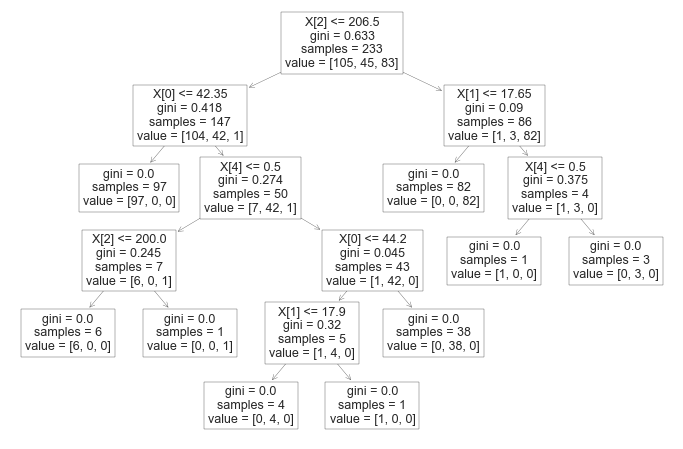

In [70]:
plt.figure(figsize=(12,8))
plot_tree(DT_model);

Yukaridaki gorsel cok net anlasilmadigi icin gorsele datamizdaki columns isimlerini ekledik. 

(filled=True ---> Butun bosluklari columns isimleri ile doldur.) (class_names=df.species.unique() -----> Yaptigin islemlerin hangi class' a ait oldugunu goster.) 

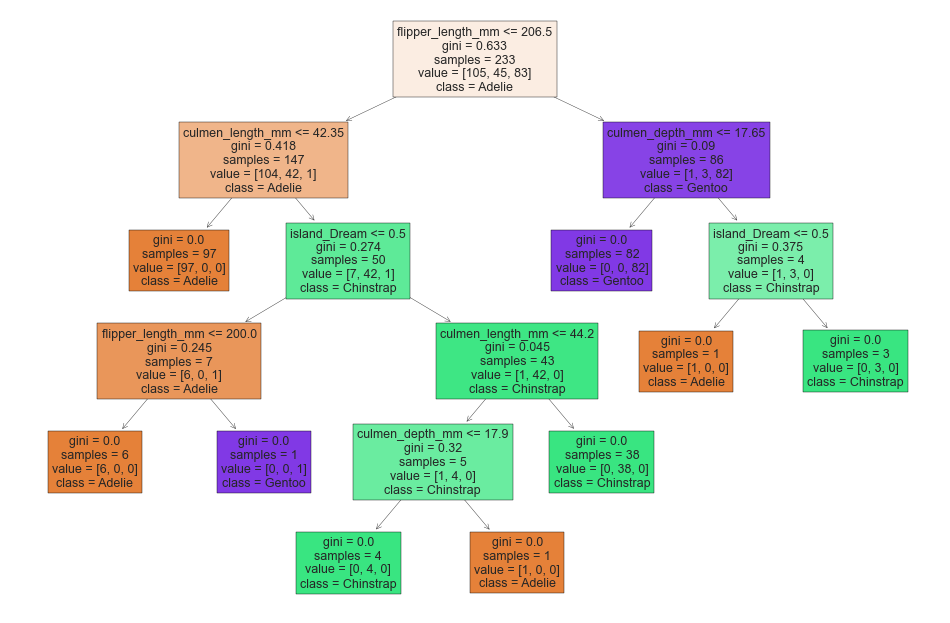

In [71]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());

## Understanding Hyperparameters

### Max depth, min samples split, min samples leaf

In [72]:
def report_model(model):
    model_pred = model.predict(X_test)         # Test setinin predict'lerini al.
    model_train_pred = model.predict(X_train)  # Train setinin predict'lerini al.
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))  # Test set skorlarini confusion_matrix' te goster.
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))  # train test skorlarini confusion_matrix' te goster.
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());  # Buldugun degerleri agac uzerinde gorselestir.

Asagidaki kodda model egitimini yapip bunu tanimladigimiz def fonksiyonun icine atip predict' leri alarak gorsellestirmesini yapacagiz :

In [73]:
pruned_tree = DecisionTreeClassifier(max_depth=None, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

PARAMETERS :

1- MAX_DEPTH------> Agac ne kadar derinlige insin? (Oklarin adim sayisi) (Bias ekleme islemi)

"max_depth = None" default degerdir ve butun siniflari mukemmel sekilde ayirana kadar, pure olana kadar gider. "Train setinde hataya yer yok." Train setinde hic hata olmamasi bizi overfitting' e goturur. Bu yuzden en alttaki leaf' lere bias ekleyerek hata yaptirmamiz gerekir ki overfitting' i engelleyelim. Bunu da max_depth ile oynayarak yapabiliriz. Amacimiz; train setine hata yaptirarak test seti ile arasindaki farki azaltmak

!!! En fazla kullanilan parametre max_depth' tir. Diger parametreler ile pek oynanmaz cunku cok buyuk data setlerinde cok ince ayar gerektirir. !!!

In [74]:
pruned_tree = DecisionTreeClassifier(max_depth=None, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



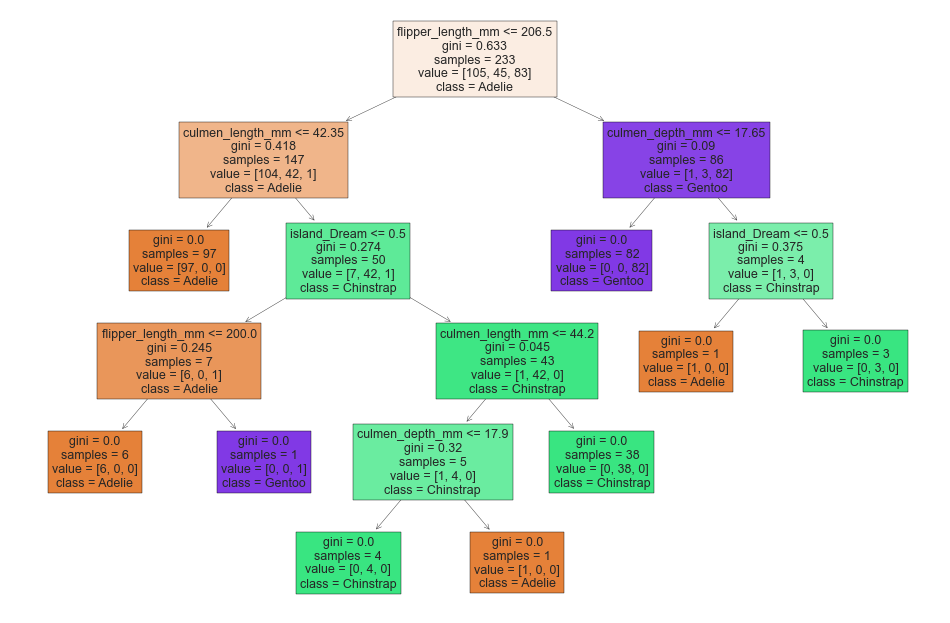

In [75]:
report_model(pruned_tree)

In [76]:
pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=101)



Test Set
[[36  5  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101



Train Set
[[97  8  0]
 [ 0 45  0]
 [ 0  1 82]]


              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96       105
   Chinstrap       0.83      1.00      0.91        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.96       233
   macro avg       0.94      0.97      0.95       233
weighted avg       0.97      0.96      0.96       233



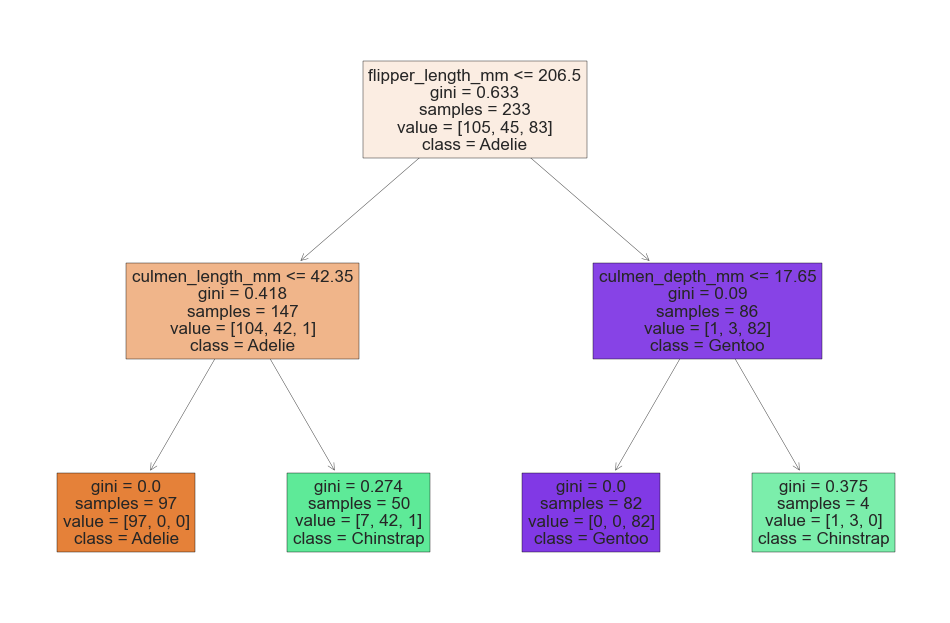

In [77]:
report_model(pruned_tree)

In [78]:
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=101)



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[104   1   0]
 [  0  45   0]
 [  1   0  82]]


              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       105
   Chinstrap       0.98      1.00      0.99        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.99       233
   macro avg       0.99      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



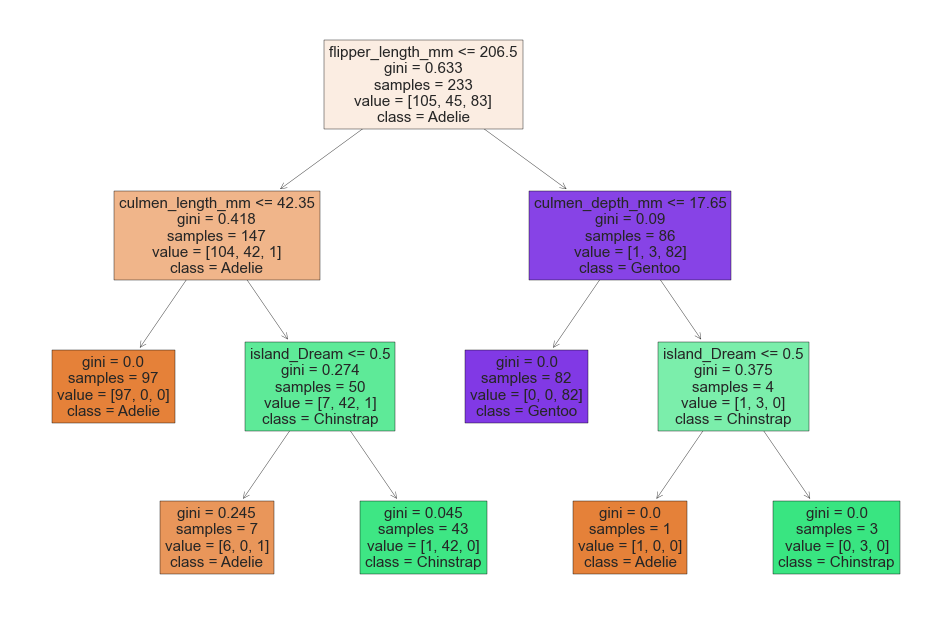

In [79]:
report_model(pruned_tree)

2- MIN_SAMPLES_SPLIT ----> Bir yapragin bolunebilmesi icin o yaprakta bulunmasi gereken sample sayisi. Default degeri=2. Yani, "sample sayisi en az 2 ise bolunmeye devam et". Hata kaldiysa bolmeye devam eder, kalmadiysa durur. Ayarlamasi cok fazla dikkat gerektirir. Bu yuzden ilk asamada degistirilmesi tercih edilmez.

In [80]:
pruned_tree = DecisionTreeClassifier(max_depth=None, random_state=101, min_samples_split=5)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[104   1   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      0.99      1.00       105
   Chinstrap       0.98      1.00      0.99        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       0.99      1.00      0.99       233
weighted avg       1.00      1.00      1.00       233



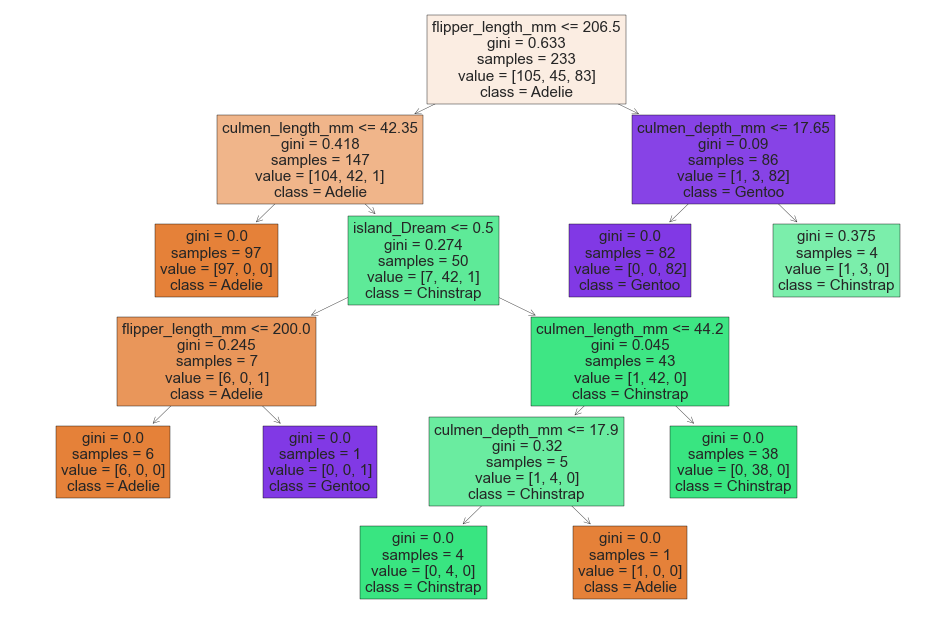

In [81]:
report_model(pruned_tree)

3- MEAN_SAMPLES_LEAF -----> Bir yapragin yaprak olarak kabul edilebilmesi icin o yaprakta bulunmasi gereken min gozlem sayisi. Default degeri = 1. Yani "Verilen degerin altinda sample sayisi varsa artik onu yaprak olarak kabul etme." Bu parametre de overfittin ile mucadelede yardimcidir fakat buyuk data setlerinde cok ince ayar istedigi icin cok fazla oynanmaz.

In [82]:
pruned_tree = DecisionTreeClassifier(max_depth=None, random_state=101, min_samples_leaf=10)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=101)



Test Set
[[39  1  1]
 [ 5 16  2]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.89      0.95      0.92        41
   Chinstrap       0.94      0.70      0.80        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.91       101
   macro avg       0.92      0.88      0.89       101
weighted avg       0.91      0.91      0.91       101



Train Set
[[103   1   1]
 [  4  38   3]
 [  1   0  82]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.97       105
   Chinstrap       0.97      0.84      0.90        45
      Gentoo       0.95      0.99      0.97        83

    accuracy                           0.96       233
   macro avg       0.96      0.94      0.95       233
weighted avg       0.96      0.96      0.96       233



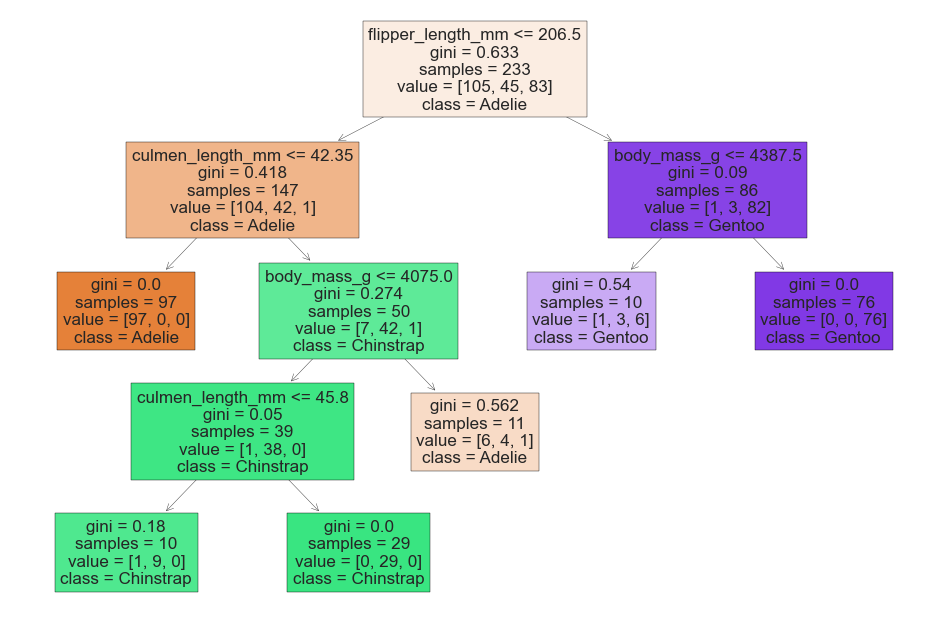

In [83]:
report_model(pruned_tree)

4- MAX_LEAF_NODES -------> En sonda kalan yaprak sayisini ayarlar. Diger parametreler gibi overfitting ile mucadele etmede kullanilir.  (Default degeri= None)

In [84]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101,)
pruned_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)



Test Set
[[40  1  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



Train Set
[[104   1   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      0.99      1.00       105
   Chinstrap       0.98      1.00      0.99        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       0.99      1.00      0.99       233
weighted avg       1.00      1.00      1.00       233



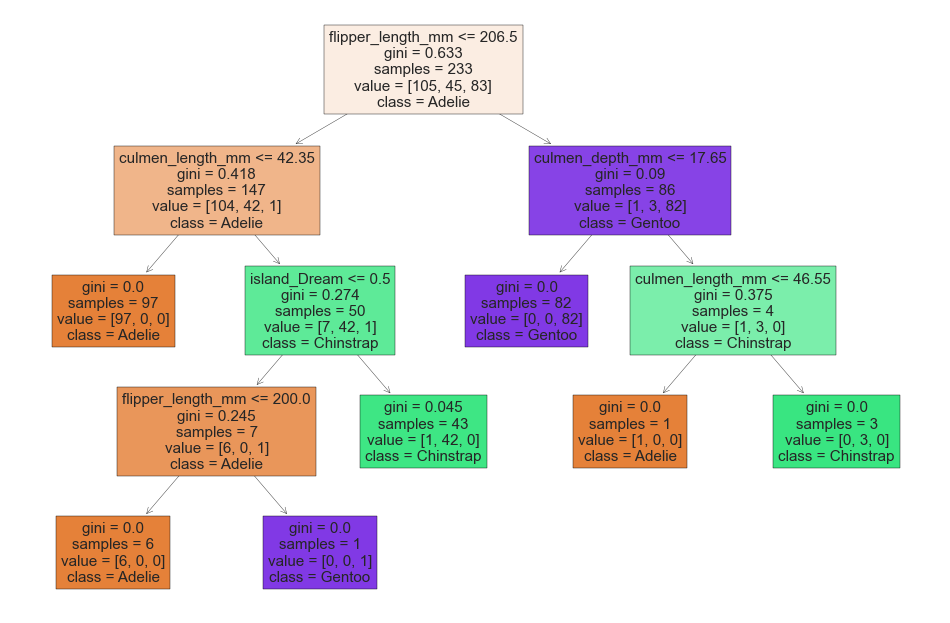

In [85]:
report_model(pruned_tree_2)

5- SPLITTER ------> "Hangi feature tek bir soru ile butun class'lari en dogru sekilde ayirir?" Her yeni dalda en one cikan feature' i secer.( Default degeri='best')

In [86]:
tree = DecisionTreeClassifier(splitter = "best")
tree.fit(X_train,y_train)

DecisionTreeClassifier()



Test Set
[[41  0  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



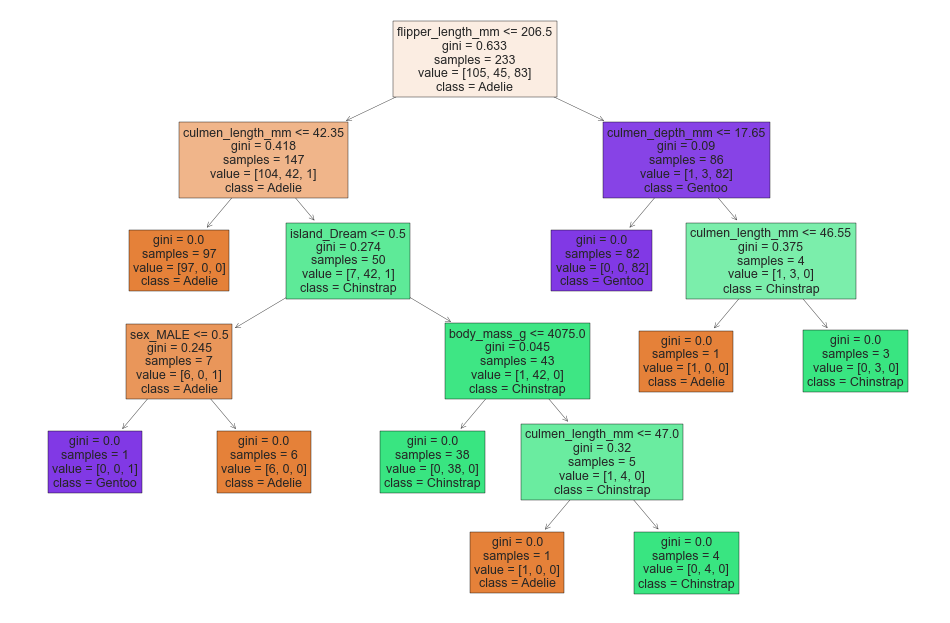

In [87]:
report_model(tree)

Yukarida da goruldugu gibi ilk soruda Gentoo cinsinin 82 tanesi tek bir soru ile siniflandirilmis.

Asagidaki gibi splitter' i random secersek tek bir soruda en iyi cevabi kim veriyor buna bakmaz rastgele bir secim yapar. Bastan itibaren tahminlerini en iyi sekilde yapamayacagi icin de modelin siniflandirma icin soracagi sorular artacaktir. Bu yuzden ilk soruda ayirt edici soruyu sormak cok onemlidir. Fakat bunun da modeli overfitting' e goturme tehlikesi vardir.

In [88]:
tree = DecisionTreeClassifier(splitter = "random")
tree.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')



Test Set
[[36  3  2]
 [ 1 22  0]
 [ 0  1 36]]


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.85      0.96      0.90        23
      Gentoo       0.95      0.97      0.96        37

    accuracy                           0.93       101
   macro avg       0.92      0.94      0.93       101
weighted avg       0.93      0.93      0.93       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



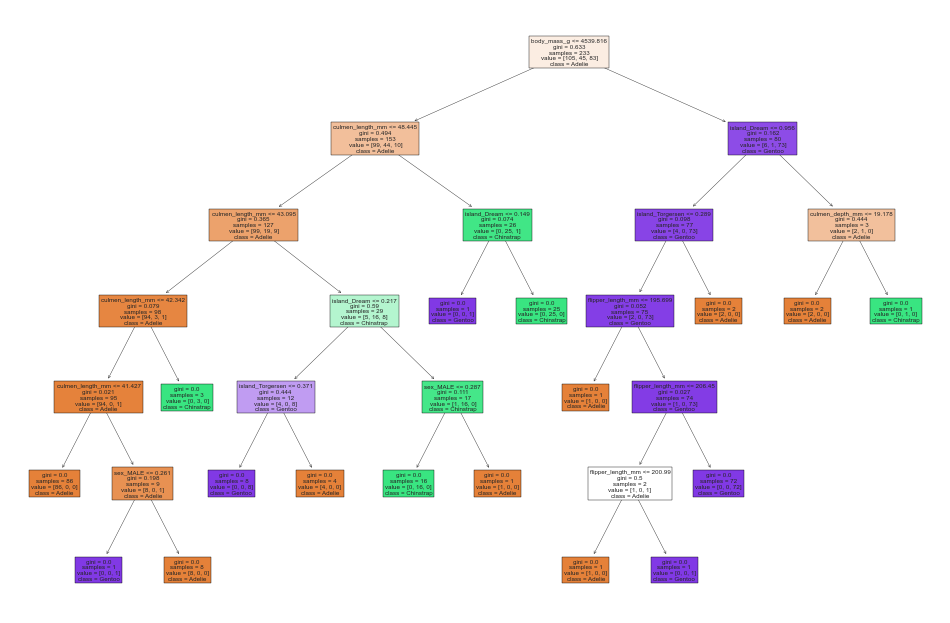

In [89]:
report_model(tree)

6- MAX_FEATURES  ----->Tum feature'lari gezerek "En iyi soruyu hangi feature'a sorabilirim?" diyor ve en yuksek cevabi aldigi feature' i seciyor. Her adimda datadaki tum feature'lari gezerek en iyiyi arar.(Default degeri=None)

max_features = None dendiginde kac tane feature varsa hepsine gider ve en iyi cevabi vereni secer.

max_features = 3 dendiginde rastgele 3 feature secer ve onlar arasindan en iyi cevabi aldigi ile yoluna devam eder. Bu da bir overfitting ile mucadele yoludur. Nedeni ise; modelin her zaman en guclu feature' i secmesini onleyip rastgele secim yapmasini sagliyoruz.

In [90]:
tree = DecisionTreeClassifier(max_features = None)
tree.fit(X_train,y_train)

DecisionTreeClassifier()



Test Set
[[40  1  0]
 [ 3 20  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



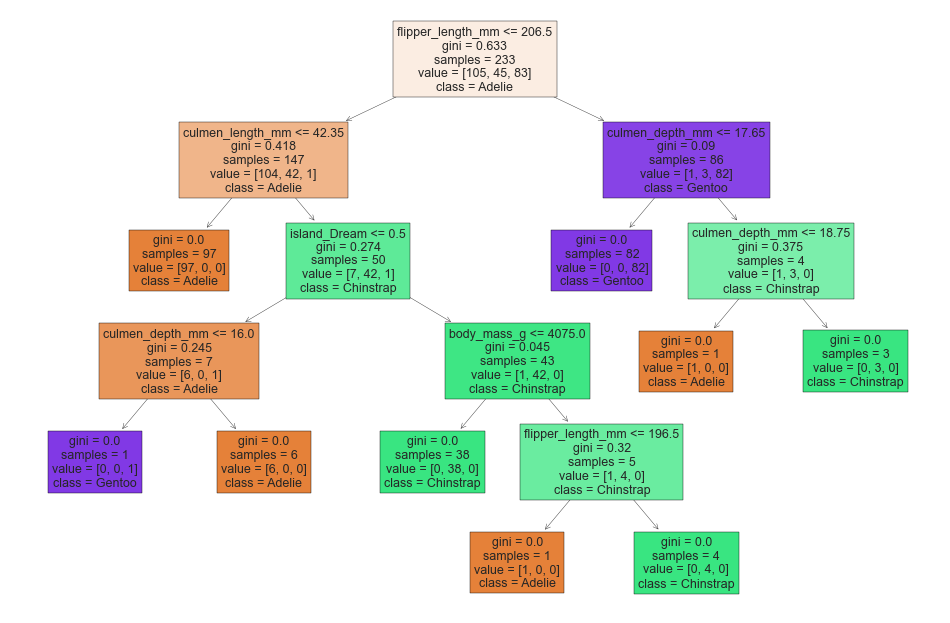

In [91]:
report_model(tree)

In [177]:
tree = DecisionTreeClassifier(max_features = 3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_features=3)



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  1 36]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.88      0.96      0.92        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.96       101
   macro avg       0.95      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



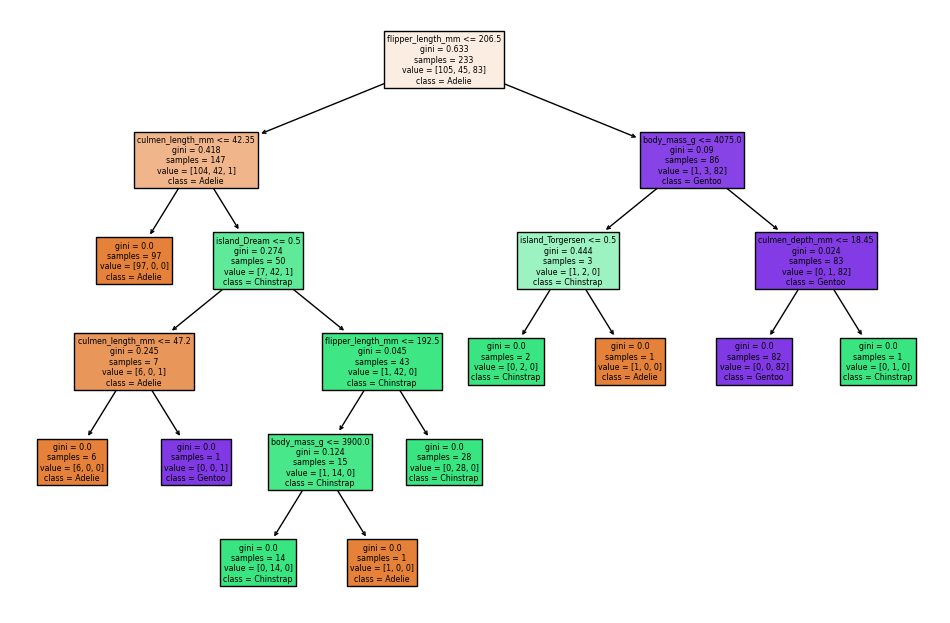

In [178]:
report_model(tree)

7- CRITERION -------> (Default degeri='gini')

GINI --> Bulundugu bolgedeki yanlis hesaplamanin degerini minimize etmeye calisir. Bu yuzden gini kucukse, hata da kucuk demektir. Basari arttikca gini 0' a yaklasir. Tum class' lari mukemmel ayirdigi noktada gini=0 olur.

Gini, her dalda ayirt edici soruyu sordugunda en dusuk degeri veren (yani en kucuk hatayi veren) class' i secer.

ENTROPY --> Kaos demektir. Kaosun en az olmasini isteriz. 

Gini olasilik uzerinden hesap yapar, hesaplamasi daha kolaydir; entropi log2 uzerinden hesaplama yapar, hesaplamasi daha maliyetlidir. Bu yuzden criterion default degeri gini'dir. Hangisi tercih edilirse edilsin ayni sonuclar alinir.

!!! Basari orani arttikca gini ve entropy 0' a yaklasir. !!!

In [179]:
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=101,)
gini_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



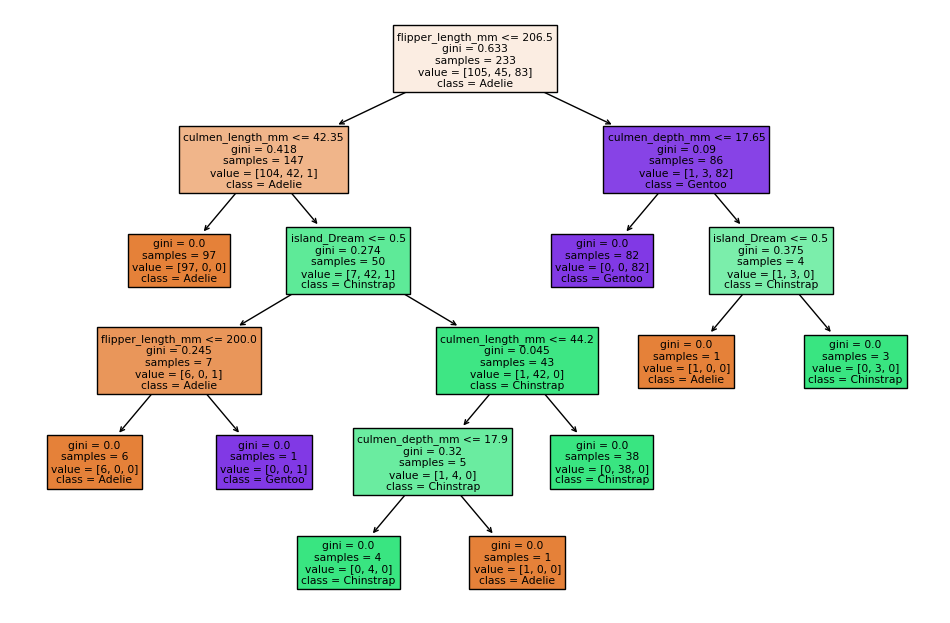

In [182]:
report_model(gini_tree)

In [183]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101,)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



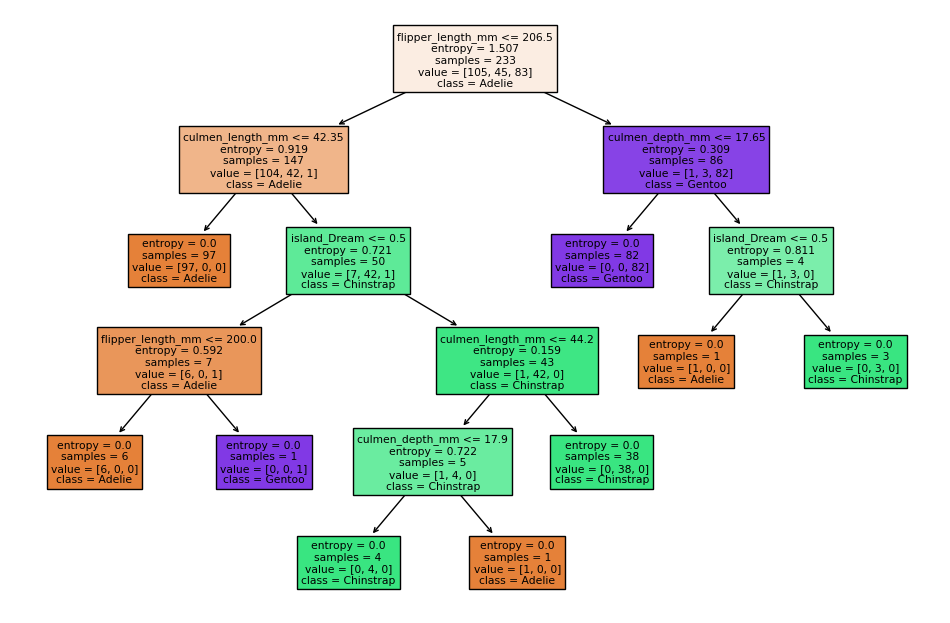

In [184]:
report_model(entropy_tree)

max_depth cok kati budama yapar, bulundugu katmandaki tum dallari budar, diger butun yontemler daha soft budama yaparlar ama bizim en cok kullanacagimiz parametre max_depth olacak. Overfitting' e en net mudahale yapan max_depth' dir, skorlar iyilesiyor mu diye bu deger oynanarak en iyisi bulunabilir.

Decision Tree parametrelerinin hepsi overfitting ile mucadele icin kullaniliyor, budama islemi yapiyor ama bizim icin en onemli parametre "max_features". Bu parametrelerle biz train setine bias ekleyerek test seti ile arasindaki acigi kapatmaya calisiyoruz. Random Forest modelinde de yine bu parametreleri kullanacagiz sadece birkac parametre daha eklenecek.

GridSearch bizim icin en iyi parametreleri bulsun :

## Find Best Parameters

!!! Eger daha en onemli feature' i dusurmeye karar verdiysek ve skorlarimiz o haliyle daha da iyilestiyse GridSearch islemine datanin yeni halini vererek devam ederiz. !!!

In [92]:
from sklearn.model_selection import GridSearchCV

GridSearch'e verilen degerlerin olabildigince minimize edilmesi gerekir cunku buyuk data setlerinde her deger icin tek tek hesap yapmasi cok uzun surer.

In [93]:
model = DecisionTreeClassifier(random_state=101)

In [94]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],       # auto --> Feature sayisinin karekokunu alir.
              "max_depth": [None, 2,3, 4, 5],                              # log2 --> Feature sayisinin 2 tabaninda logunu alir.
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [95]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [96]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [97]:
grid_model.best_params_       # GridSearch de default degerleri en iyisi olarak secti.

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [98]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

